<h1>This is a Machine Learning Model for predicting Heart Disease for a Patient. Please refer to README.txt for additional details. To execute this ML Model we will follow the CRISP-DM methodology.</h1>

<h3>STEP 1  :  Data Collection and Loading the dataframe</h3> 

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [164]:
heart = pd.read_csv('data/heart.csv')
print(f"Data loaded successfully")

Data loaded successfully


In [165]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [166]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [167]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [168]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h3>STEP 2 : Exploratory Data Analysis & Visualizations</h3> 

In [169]:
# Divide features into categorical and numerical based on data type
categorical_columns = heart.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = heart.select_dtypes(include=['number']).columns.tolist()

# Remove the target variable from the feature lists if it's included
if 'HeartDisease' in categorical_columns:
    categorical_columns.remove('HeartDisease')
if 'HeartDisease' in numerical_columns:
    numerical_columns.remove('HeartDisease')

print(f"Numerical features: {numerical_columns}")
print(f"Categorical features: {categorical_columns}")

Numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


<Figure size 1000x800 with 0 Axes>

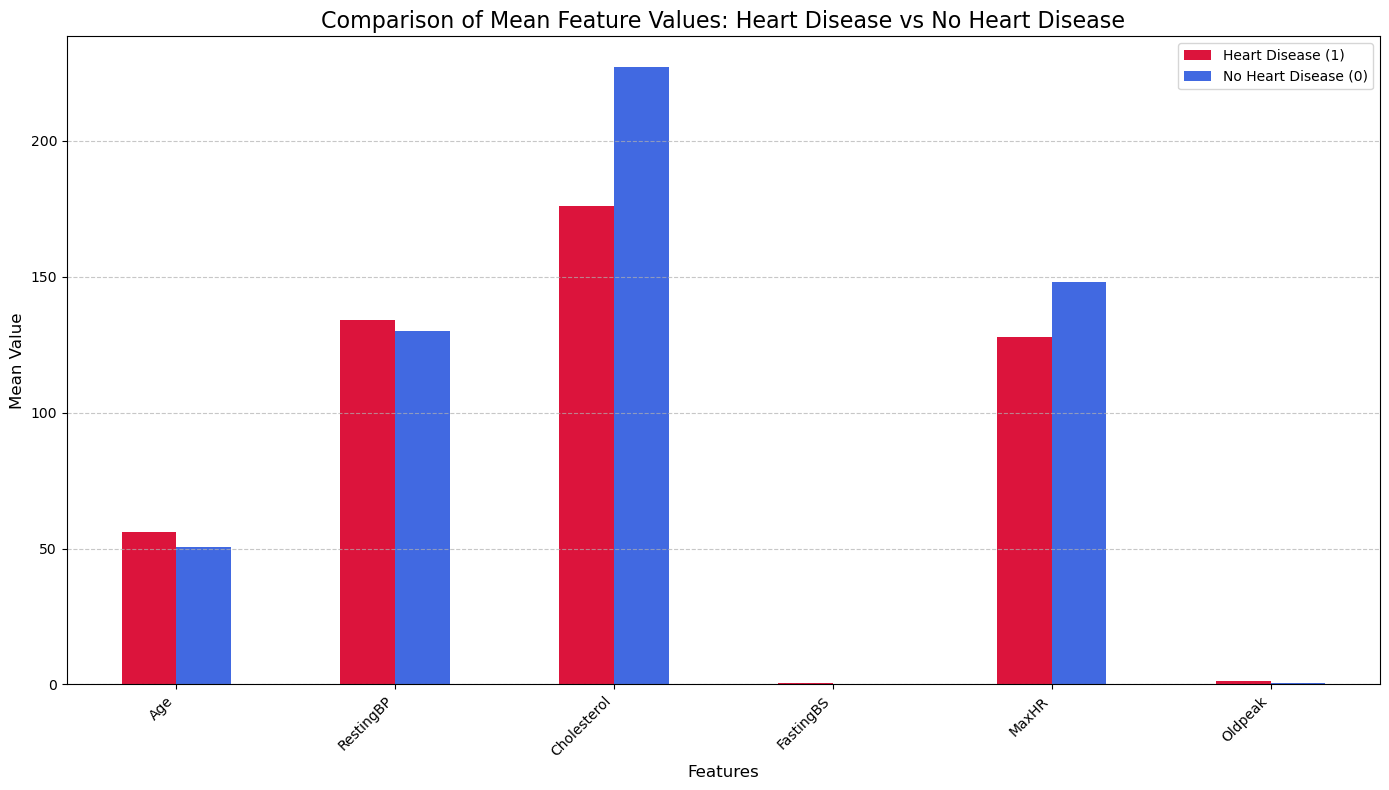

In [170]:
# Analysis for numerical columns

# Extract the means for each group (1 for heart disease and 0 for no heart disease)
heart_disease_means = grouped_means.loc[1] 
no_heart_disease_means = grouped_means.loc[0]

# Create a DataFrame for plotting
plot_heart = pd.DataFrame({
    'Heart Disease': heart_disease_means,
    'No Heart Disease': no_heart_disease_means
})

# Plot
plt.figure(figsize=(10, 8))
ax = plot_df.plot(
    kind='bar', 
    color=['crimson', 'royalblue'],
    figsize=(14, 8)
)

# Define the labels
plt.title('Comparison of Mean Feature Values: Heart Disease vs No Heart Disease', fontsize=16)
plt.ylabel('Mean Value', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Heart Disease (1)', 'No Heart Disease (0)'])

# Show the plot
plt.tight_layout()
plt.show()

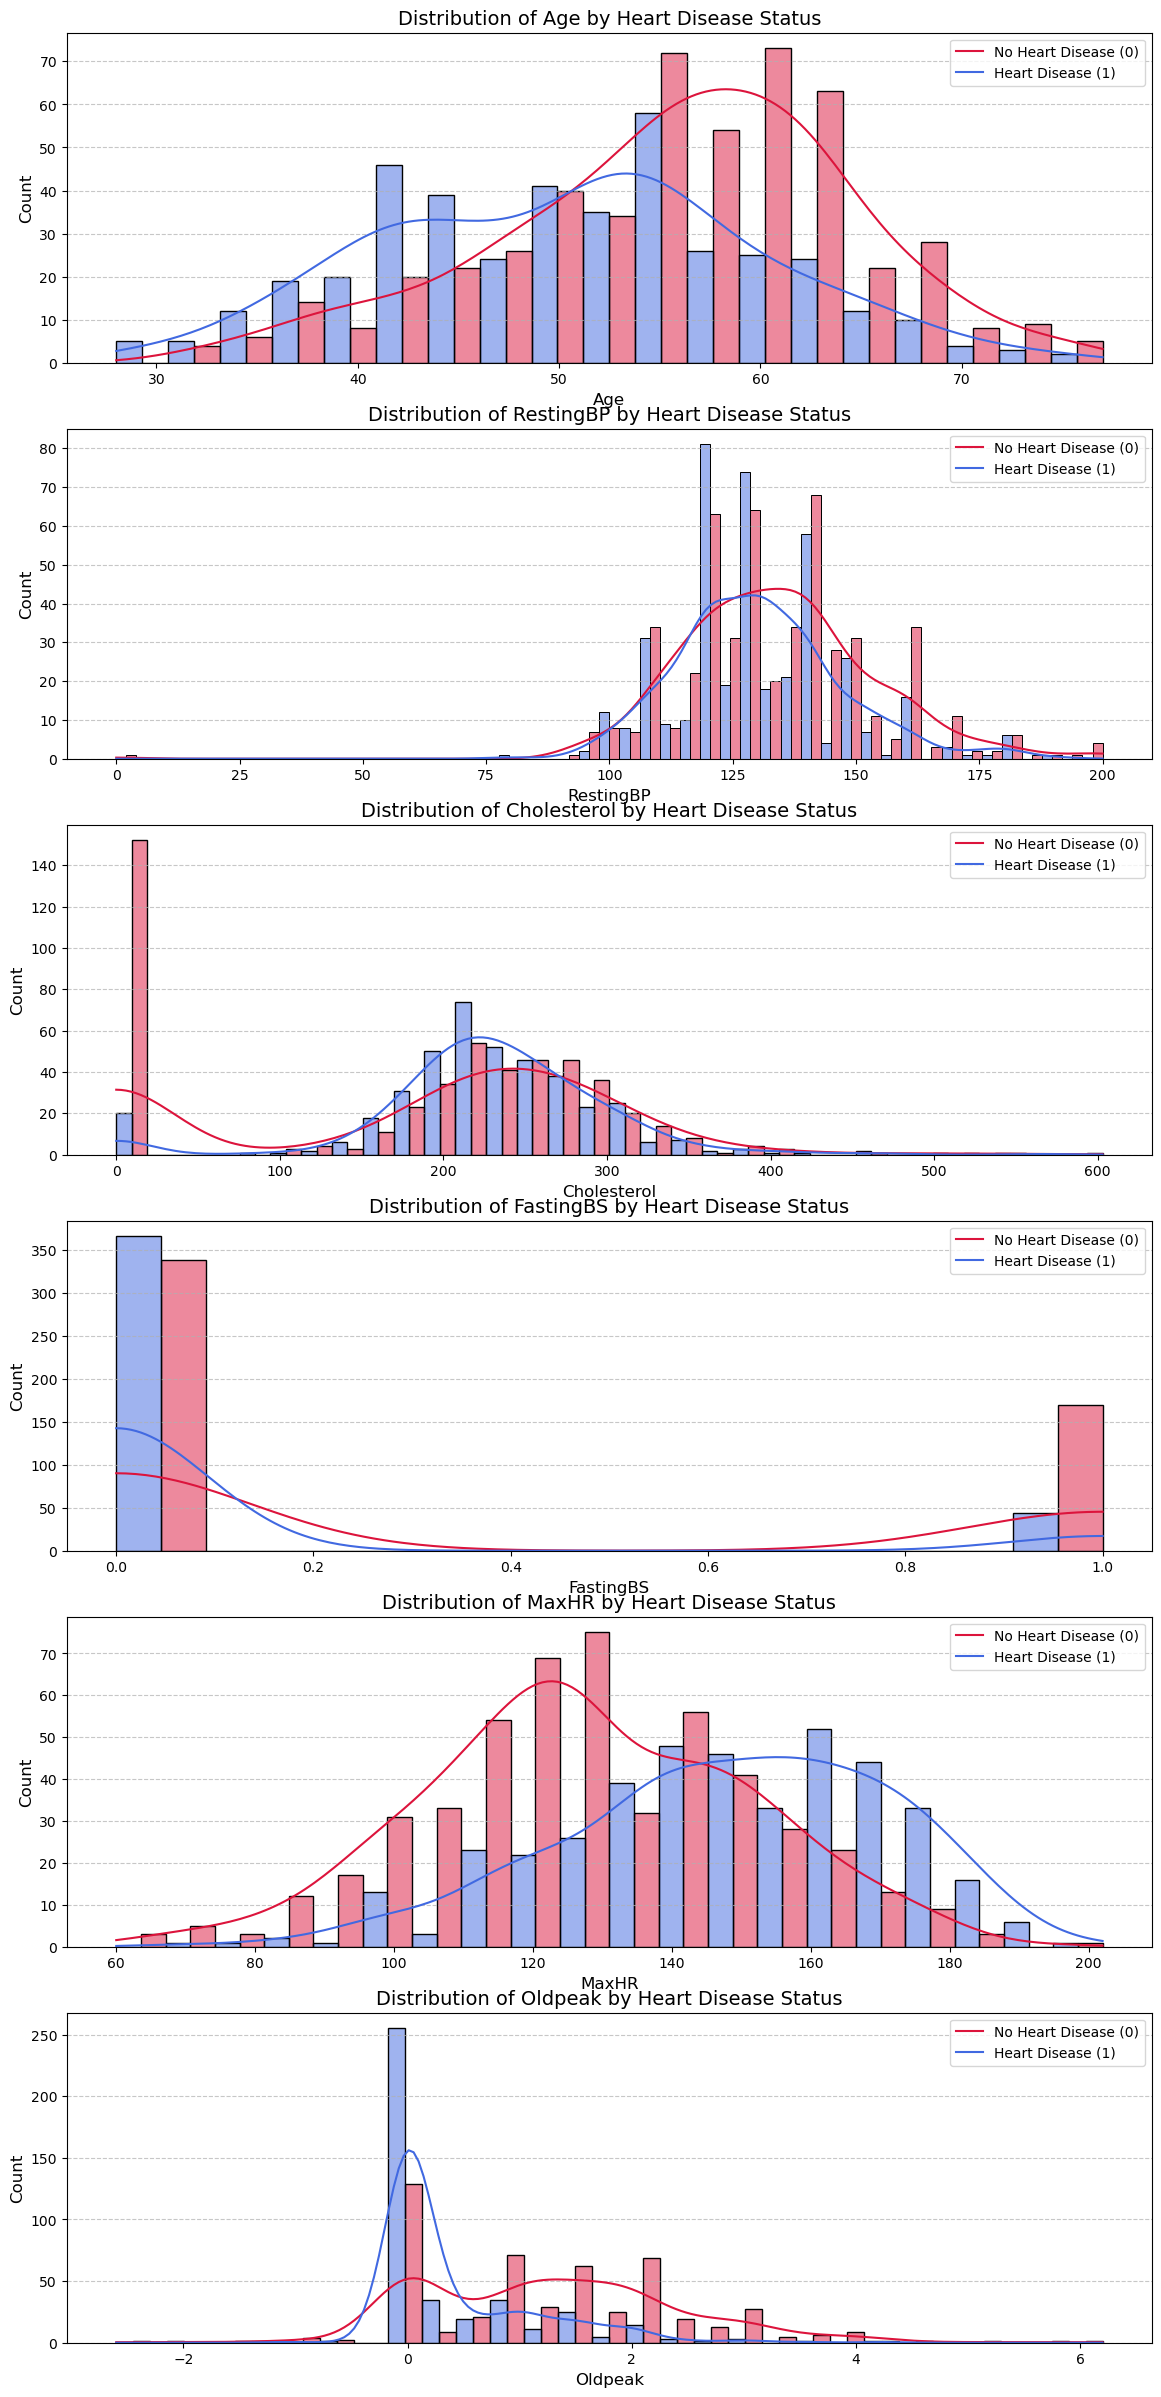

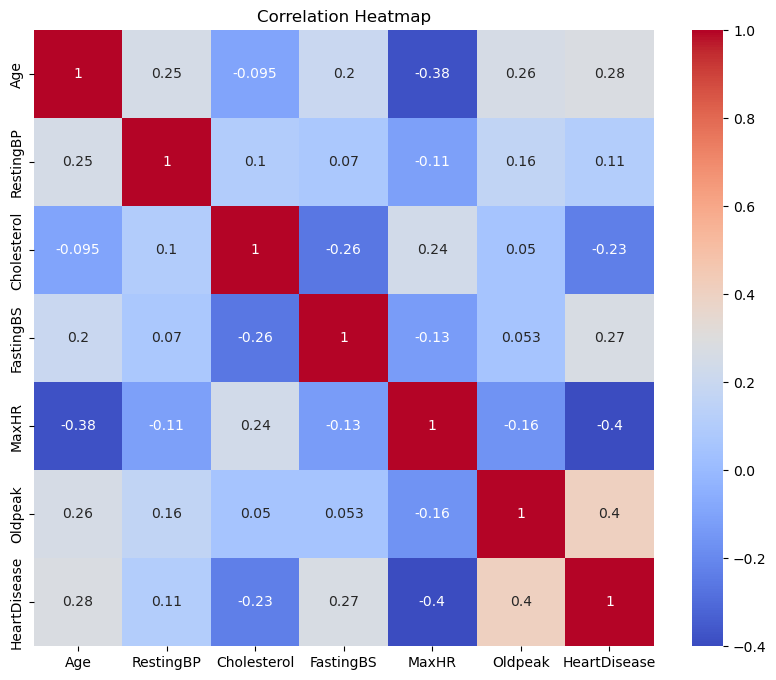

In [171]:
# Data Visualization for numerical columns

if numerical_columns:
    # Create subplots for each numerical column
    n_nums = len(numerical_columns)
    fig, axes = plt.subplots(nrows=n_nums, figsize=(14, 5*n_nums))
    
    for i, feature in enumerate(numerical_columns):
        # Create separate histograms for each heart disease status
        sns.histplot(
            data=heart, 
            x=feature, 
            hue='HeartDisease',
            multiple='dodge',
            palette=['royalblue', 'crimson'],
            kde=True,
            ax=axes[i]
        )
        
        axes[i].set_title(f'Distribution of {feature} by Heart Disease Status', fontsize=14)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].legend(['No Heart Disease (0)', 'Heart Disease (1)'])
    
   # plt.tight_layout()
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns + ['HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

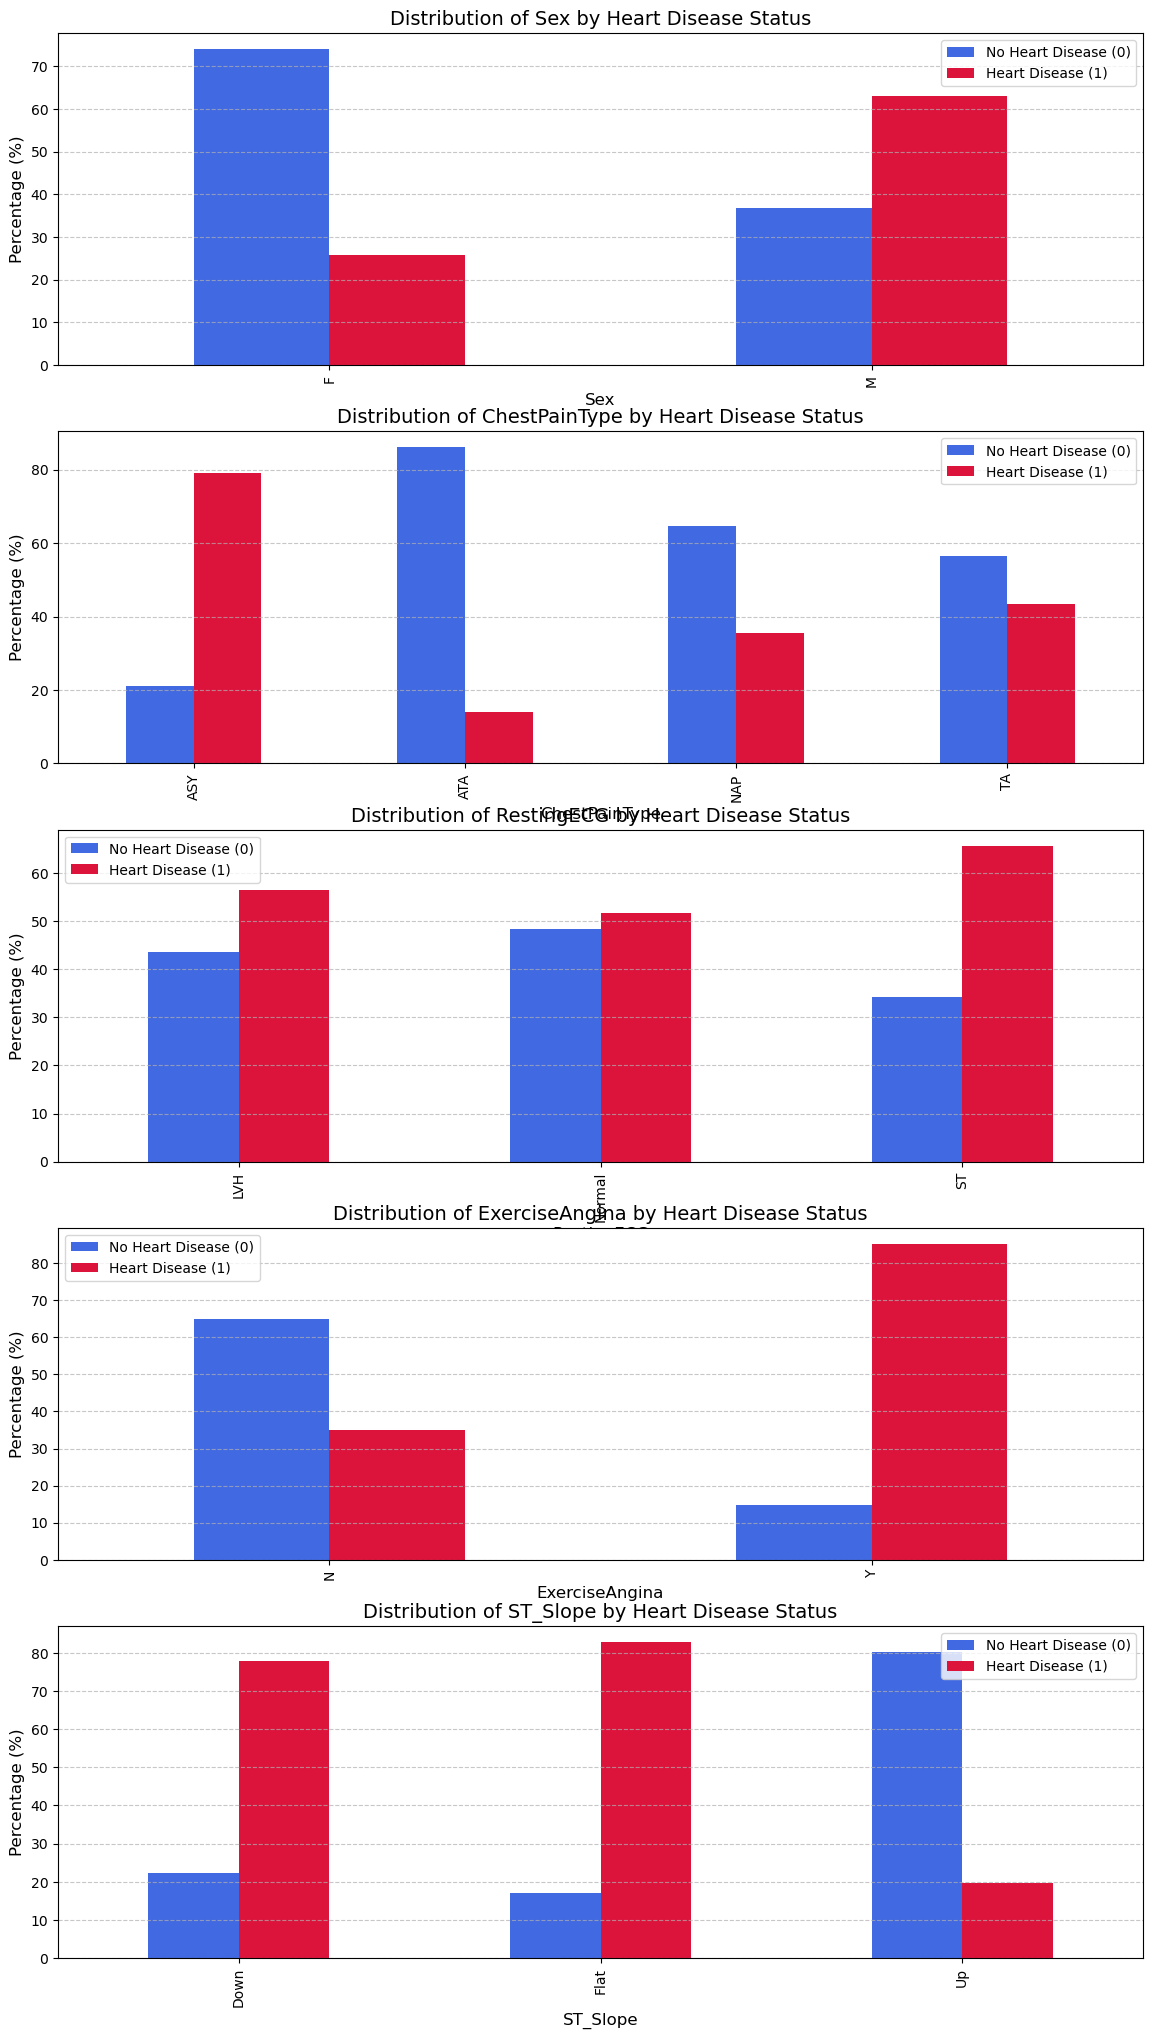

In [172]:
# Data Visualization for categorical columns

if categorical_columns:
    # Create subplots for each categorical column
    n_cats = len(categorical_columns)
    fig, axes = plt.subplots(nrows=n_cats, figsize=(14, 5*n_cats))
    
    # Handle the case when there's only one categorical column
    if n_cats == 1:
        axes = [axes]
    
    for i, feature in enumerate(categorical_columns):
        # Create a crosstab of the feature vs heart disease
        ct = pd.crosstab(heart[feature], heart['HeartDisease'])
        
        # Convert to percentages
        ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
        
        # Plot
        ct_pct.plot(
            kind='bar',
            stacked=False,
            color=['royalblue', 'crimson'],
            ax=axes[i]
        )
        
        axes[i].set_title(f'Distribution of {feature} by Heart Disease Status', fontsize=14)
        axes[i].set_ylabel('Percentage (%)', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].legend(['No Heart Disease (0)', 'Heart Disease (1)'])
    
    #plt.tight_layout()
    plt.show()

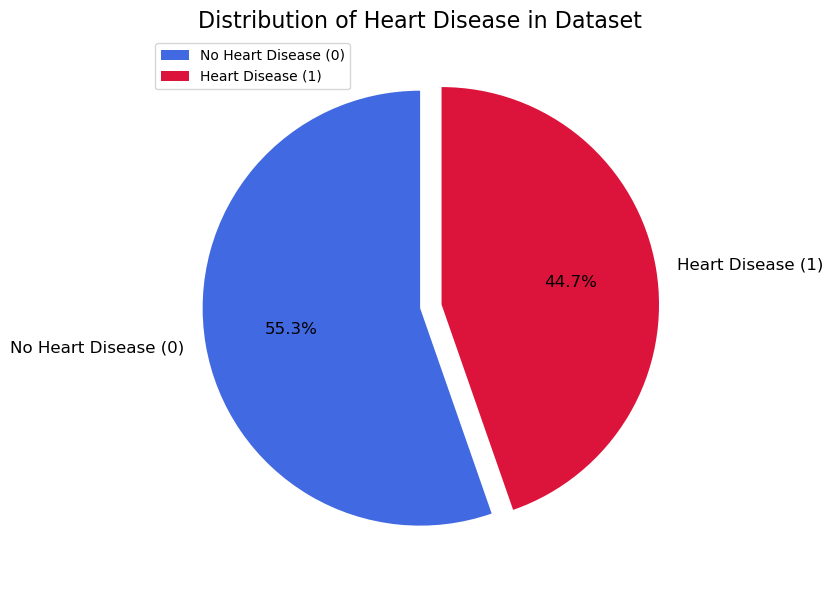

In [173]:
# Data Visualization for HeartDisease column (target variable)

# Create a figure
plt.figure(figsize=(8, 6))

# Count the values in HeartDisease column
heart_disease_counts = heart['HeartDisease'].value_counts()

# Create a pie chart
plt.pie(
    heart_disease_counts,
    labels=['No Heart Disease (0)', 'Heart Disease (1)'],
    autopct='%1.1f%%',
    colors=['royalblue', 'crimson'],
    explode=[0, 0.1],
    startangle=90,
    textprops={'fontsize': 12}
)

# Add a title
plt.title('Distribution of Heart Disease in Dataset', fontsize=16)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<h5>Summary:</h5>

1. The Dataset has almost equal amounts of Heart Disease vs No Heart Disease Data.
2. Male population is more susceptible to Heart Disease
3. Older age (55-65) and High Reseting Blood Pressure increases the chances of Heart Disease
4. Max Heart Rate higher than 130 and Cholestrol higher than 200 increase the risk of heart disease
5. Chest Pain induced by exercise angina is a synptom of heart diease.
6. Chest Pain type of 'ASY'has a very high risk of heart disease

<h3>STEP 3 : Feature Engineering</h3> 

In [174]:
#Target Variable, ie Heart Disease column which is what we have to predict.

target_variable = 'HeartDisease'
features = [col for col in data.columns if col != target_variable]
print('Target Variable: ',target_variable)

# Identify categorical and numerical features as already defined in "Step 2" above
print(f"Numerical features: {numerical_columns}")
print(f"Categorical features: {categorical_columns}")

# Create a preprocessor using ColumnTransformer
transformers = []
if categorical_columns:
   transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns))
if numerical_columns:
   transformers.append(('num', StandardScaler(), numerical_columns))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Separate features (X) and target (y)
X = data[features]
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





Target Variable:  HeartDisease
Numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


<h3>STEP 4 : Model Training</h3> 

In [175]:
#Baseline model with Logistic Regression

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) 
model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

<h3>STEP 5 : Evaluation</h3> 

Accuracy: 0.8532608695652174

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Confusion Matrix:
[[67 10]
 [17 90]]
ROC AUC: 0.9268115062507585


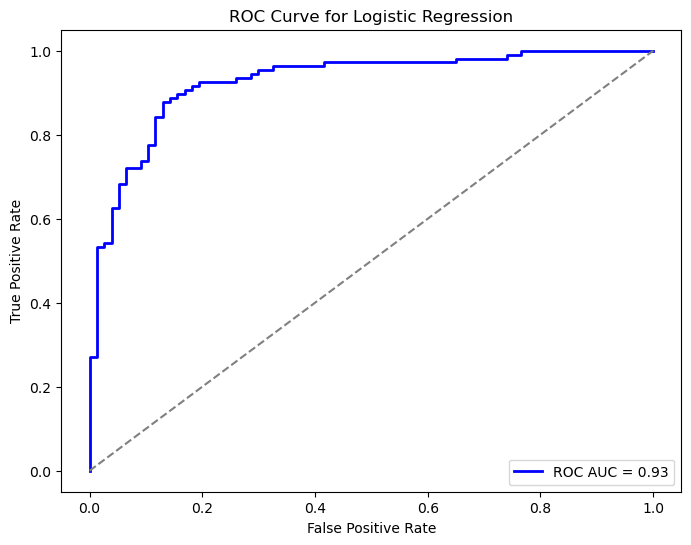

In [176]:
#Make predictions (probabilities for ROC AUC)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


#Compute ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

<h4>CONCLUSION: For the Baseline we have 85% accuracy and the ROC Area Under the curve is 92%. Next we will try other models to see which model is best suited for this classification problem.</h4>